In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [2]:
from  sklearn.model_selection import train_test_split

In [3]:
sns.set(style="darkgrid", color_codes=True)

In [4]:
path=r"/Users/nicolo/Desktop/Uni_project/pid-5M.csv"

In [5]:
dataSET=pd.read_csv(path)

In [6]:
dataSET

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...,...
4999995,211,0.835889,0.495847,0.975812,0,0.000000,0.046967
4999996,211,2.027470,0.287966,1.222890,0,0.197894,0.186404
4999997,211,0.827497,0.689746,0.980957,0,0.000000,0.000000
4999998,2212,1.331200,0.382746,0.811818,0,0.036942,0.056947


In [7]:
data=dataSET.head(50000)
data

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...,...
49995,211,1.205000,0.372458,0.988503,0,0.029572,0.049577
49996,2212,0.899519,0.685490,0.701149,0,0.000000,0.000000
49997,211,2.112610,0.177894,0.996632,0,0.027283,0.041749
49998,211,0.913405,0.454171,1.000300,0,0.026596,0.000000


In [8]:
y=data.id
y.unique()

array([ 211, 2212,  321,  -11])

In [9]:
y[0]

211

In [10]:
y

0         211
1         211
2        2212
3         211
4        2212
         ... 
49995     211
49996    2212
49997     211
49998     211
49999     211
Name: id, Length: 50000, dtype: int64

In [11]:
for i in range(0,50000):
    if y[i]==211:
       y[i]=0
    else:
       y[i]=1

/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_1131/823603527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=0
/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_1131/823603527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=1


In [12]:
y.unique()

array([0, 1])

In [13]:
y

0        0
1        0
2        1
3        0
4        1
        ..
49995    0
49996    1
49997    0
49998    0
49999    0
Name: id, Length: 50000, dtype: int64

In [14]:
df=data.drop(['id'],axis=1)

In [15]:
np.unique(y,return_counts = True)

(array([0, 1]), array([27974, 22026]))

In [16]:
dt=pd.concat((df,y),axis=1)

In [17]:
dt

,p,theta,beta,nphe,ein,eout,id
0,0.780041,1.081480,0.989962,0,0.000000,0.000000,0
1,0.260929,0.778892,0.902450,0,0.000000,0.000000,0
2,0.773022,0.185953,0.642428,4,0.101900,0.000000,1
3,0.476997,0.445561,0.951471,0,0.000000,0.000000,0
4,2.123290,0.337332,0.908652,0,0.034379,0.049256,1
...,...,...,...,...,...,...,...
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577,0
49996,0.899519,0.685490,0.701149,0,0.000000,0.000000,1
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749,0
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000,0


In [18]:
df_0 = dt[dt.id == abs(0)]
df_0

,p,theta,beta,nphe,ein,eout,id
0,0.780041,1.081480,0.989962,0,0.000000,0.000000,0
1,0.260929,0.778892,0.902450,0,0.000000,0.000000,0
3,0.476997,0.445561,0.951471,0,0.000000,0.000000,0
5,0.403296,0.694215,0.958553,0,0.000000,0.000000,0
10,0.612497,0.809353,0.982344,0,0.000000,0.000000,0
...,...,...,...,...,...,...,...
49994,1.059890,0.316029,1.004300,0,0.032639,0.052415,0
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577,0
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749,0
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000,0


In [19]:
df_1=dt[dt.id==abs(1)]
df_1

,p,theta,beta,nphe,ein,eout,id
2,0.773022,0.185953,0.642428,4,0.101900,0.000000,1
4,2.123290,0.337332,0.908652,0,0.034379,0.049256,1
6,1.382620,0.436689,0.844835,0,0.200275,0.053651,1
7,1.133130,0.276831,0.781295,0,0.044038,0.093980,1
8,0.656291,0.542507,0.560291,0,0.083406,0.000000,1
...,...,...,...,...,...,...,...
49988,0.599832,0.525916,0.770316,0,0.000000,0.000000,1
49989,1.421840,0.456268,0.831724,0,0.028061,0.225727,1
49990,1.643850,0.332099,0.885782,0,0.146212,0.044724,1
49993,1.361720,0.351195,0.816579,0,0.043763,0.068574,1


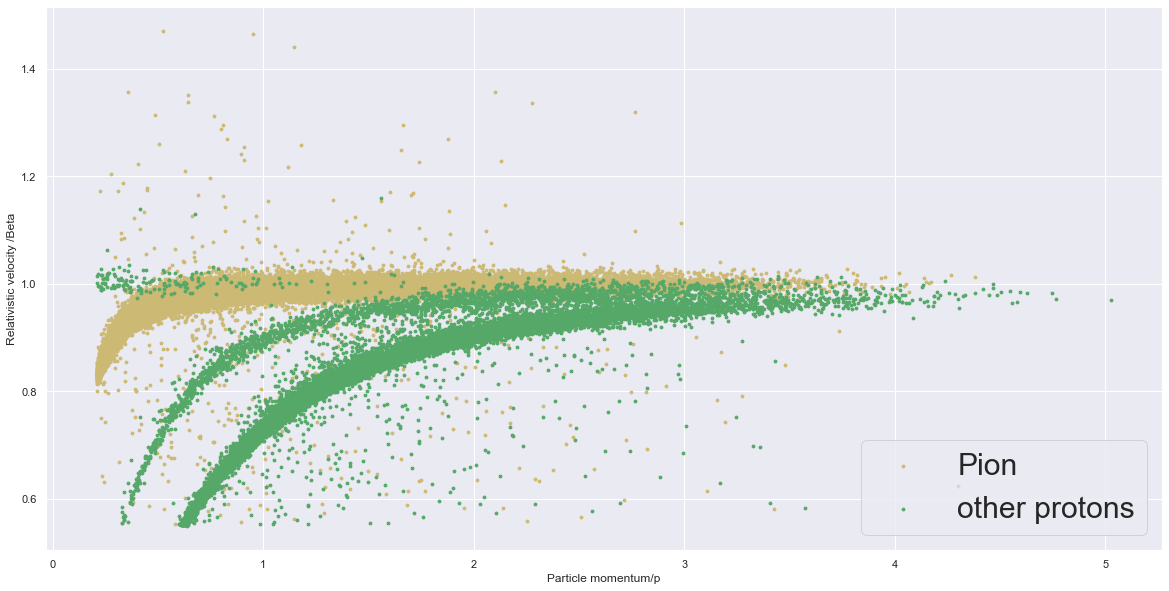

In [20]:
plt.subplots(figsize=(20,10))
plt.scatter(df_0.p,df_0.beta,color='y',s=8,label='Pion')
plt.scatter(df_1.p,df_1.beta,color='g',s=8,label='other protons')
plt.xlabel('Particle momentum/p')
plt.ylabel('Relativistic velocity /Beta')
plt.legend(loc="lower right", fontsize=30)

In [21]:
y=dt.id
x=dt.drop('id',axis=1)

In [22]:
x

,p,theta,beta,nphe,ein,eout
0,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577
49996,0.899519,0.685490,0.701149,0,0.000000,0.000000
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000


In [23]:
y

0        0
1        0
2        1
3        0
4        1
        ..
49995    0
49996    1
49997    0
49998    0
49999    0
Name: id, Length: 50000, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [26]:
x_train.head(10)

,p,theta,beta,nphe,ein,eout
25895,1.282370,0.334445,0.814019,0,0.032685,0.066148
744,0.555886,0.485823,0.983947,0,0.181872,0.038636
49213,0.838178,0.744206,0.660846,0,0.000000,0.000000
3627,0.865492,0.590850,0.982200,0,0.060609,0.000000
14998,2.038150,0.296833,0.897369,0,0.031449,0.046830
7837,0.383459,0.988636,0.952714,39,0.000000,0.000000
20099,2.624860,0.191936,1.011000,0,0.150515,0.474708
1195,1.235370,0.387276,0.986784,0,0.123415,0.000000
31865,0.700084,0.424723,0.967908,0,0.028244,0.130831
19467,0.429389,0.264467,0.963646,229,0.000000,0.000000


In [27]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50)

In [28]:
x_test.head(10)

,p,theta,beta,nphe,ein,eout
29050,2.168150,0.216010,0.989473,0,0.028885,0.050172
45706,0.275425,0.852051,0.935155,0,0.000000,0.000000
14358,2.540780,0.136054,0.951336,0,0.000000,0.047196
23502,2.007480,0.349683,0.917279,0,0.306752,0.106844
30703,0.739757,0.678399,0.629609,0,0.000000,0.000000
47266,3.244680,0.356222,0.751578,0,0.035523,0.309590
8150,1.162740,0.234729,0.778724,0,0.044724,0.080980
14071,0.294041,1.316550,0.882092,0,0.000000,0.000000
44200,0.443122,0.475624,0.936454,0,0.000000,0.000000
13426,0.587320,0.867960,0.968516,0,0.000000,0.000000


In [29]:
x_val.head(10)

,p,theta,beta,nphe,ein,eout
32105,3.168230,0.312090,0.995024,0,0.155001,0.097688
6347,2.056760,0.301507,0.900243,0,0.000000,0.000000
11535,1.574270,0.483299,0.846924,0,0.095033,0.000000
20890,1.102310,0.248917,0.992735,0,0.185397,0.097505
48591,0.289006,0.601138,0.910270,0,0.000000,0.000000
39811,1.097730,0.452776,0.766217,0,0.056214,0.106111
43255,1.751280,0.582181,1.007630,0,0.043214,0.048295
2718,2.286110,0.262116,0.918944,0,0.031220,0.055528
3528,0.450599,0.746319,0.942215,0,0.000000,0.000000
5010,0.481117,1.232160,0.966640,79,0.000000,0.000000


In [30]:
print("Shape of validation set:", x_val.shape)
print("Shape of test set:", x_test.shape)
print("Shape of training set:", x_train.shape)

Shape of validation set: (7500, 6)
Shape of test set: (7500, 6)
Shape of training set: (35000, 6)


In [31]:
dataprime=data[20:25]
dataprime

,id,p,theta,beta,nphe,ein,eout
20,0,1.664450,0.171676,0.975540,0,0.066194,0.167865
21,1,1.067830,0.382293,0.748847,0,0.106661,0.000000
22,1,1.037310,0.207644,0.748188,0,0.053559,0.074754
23,0,0.387121,0.793282,0.929699,0,0.000000,0.000000
24,0,0.363317,1.075250,0.950328,62,0.000000,0.000000


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
x_train_scaled=StandardScaler().fit_transform(x_train)
x_val_scaled=StandardScaler().fit_transform(x_val)
x_test_scaled=StandardScaler().fit_transform(x_test)

In [34]:
x_test

,p,theta,beta,nphe,ein,eout
29050,2.168150,0.216010,0.989473,0,0.028885,0.050172
45706,0.275425,0.852051,0.935155,0,0.000000,0.000000
14358,2.540780,0.136054,0.951336,0,0.000000,0.047196
23502,2.007480,0.349683,0.917279,0,0.306752,0.106844
30703,0.739757,0.678399,0.629609,0,0.000000,0.000000
...,...,...,...,...,...,...
40382,1.924160,0.461773,0.905305,0,0.042802,0.053468
45764,1.771110,0.452233,0.888100,0,0.035065,0.051362
46736,0.657816,0.468739,0.568382,0,0.056306,0.000000
28562,1.215380,0.298698,0.805075,0,0.051820,0.000000


In [35]:
x_test_scaled

array([[ 1.2474421 , -0.92854215,  0.78694813, -0.19489602, -0.34119009,
        -0.18929488],
       [-1.27914608,  1.2034496 ,  0.30016242, -0.19489602, -0.69415168,
        -0.69538036],
       [ 1.74486384, -1.19655244,  0.4451729 , -0.19489602, -0.69415168,
        -0.21930896],
       ...,
       [-0.76869444, -0.08140157, -2.98677478, -0.19489602, -0.0061275 ,
        -0.69538036],
       [-0.02440533, -0.65137427, -0.86558531, -0.19489602, -0.06094626,
        -0.69538036],
       [ 0.89445595, -0.99808551,  0.01121686, -0.19489602, -0.69415168,
        -0.06000386]])

In [36]:
x_test_scaled[:,0]

array([ 1.2474421 , -1.27914608,  1.74486384, ..., -0.76869444,
       -0.02440533,  0.89445595])

In [37]:
sum(x_test_scaled[:,0])

-1.9040324872321435e-13

In [38]:
sum(x_test_scaled)

array([-1.90403249e-13, -2.88102875e-13, -3.51176900e-12, -4.15295576e-12,
        2.08666417e-12, -1.05353920e-12])

In [39]:
sum(sum(x_test_scaled))

-7.110105906815711e-12

In [40]:
np.std(x_test_scaled)

1.0

In [41]:
np.std(x_test_scaled[:,0])

0.9999999999999999

In [42]:
import keras
import tensorflow
from keras import utils
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [43]:
n_input=x_train_scaled.shape[0]
num_classes = len(y_train.unique())
input_dim=x_train_scaled.shape[1]

In [44]:
print(n_input)
print(num_classes)
print(input_dim)

35000
2
6


In [81]:
def make_NN_model0(input_dim, num_classes, neuron_layer_1=20, dropout_prob=0.25, \
                  activation_func='relu', learning_rate=0.01,optimizer='SGD'):
    """
    Creates a 2-hidden-layer Keras Neural Network model by adding densely connected layers, \
    dropout layers, and an output layer with 'softmax' activation with appropriate number of nodes for classification
    """
    model = Sequential()
    model.add(Dense(neuron_layer_1, input_shape=(input_dim,),activation=activation_func))
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer=='SGD':
        optimizer=tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
    if optimizer=='Adam':
        optimizer=tensorflow.keras.optimizers.Adam(learning_rate=learning_rate)
    if optimizer=='RMSprop':
        optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=learning_rate)
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])  #'accuracy'
    
    return model

In [82]:
def run_NN0(model,x_train,y_train,x_val,y_val,num_epochs=200,batch_size=16,plot_loss=False,verbosity=0):
    #save best model as checkpointer
    from keras.callbacks import ModelCheckpoint
    checkpointer = ModelCheckpoint(filepath='weights.best.hdf5', 
                                   verbose=verbosity, save_best_only=True) #probabilmente dovrebbe andare fuori da funzione
    
    #filepath='model.weights.best.hdf5'
    
    # train the model
    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs,
              validation_data=(x_val, y_val), 
              verbose=verbosity, shuffle=False)
    
    if plot_loss:
        plt.plot(hist.history['accuracy'],color='red')
        plt.plot(hist.history['val_accuracy'],color='blue')
        plt.title("Training and validation set accuracy",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.legend(['Training','Validation'])
        plt.show()
        
    if plot_loss:
        plt.plot(hist.history['loss'],color='green')
        plt.plot(hist.history['val_loss'],color='violet')
        plt.title("Training and validation set loss",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.legend(['Training','Validation'])
        plt.show()
    
    return hist

In [83]:
def test_NN0(hist,x_test,y_test):
    """
    Test a NN model with test data set for accuracy
    hist: A History object generated by the Keras model fitting process
    """
    score=hist.model.evaluate(x_test, y_test,verbose=0)[1]
    return score


In [117]:
nn_model=make_NN_model0(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=100,optimizer='Adam')

Epoch 1/25
547/547 [==============================] - 1s 973us/step - loss: 0.5133 - accuracy: 0.8522 - val_loss: 0.4061 - val_accuracy: 0.8947
Epoch 2/25
547/547 [==============================] - 0s 821us/step - loss: 0.3279 - accuracy: 0.9223 - val_loss: 0.2793 - val_accuracy: 0.9336
Epoch 3/25
547/547 [==============================] - 0s 846us/step - loss: 0.2329 - accuracy: 0.9433 - val_loss: 0.2145 - val_accuracy: 0.9447
Epoch 4/25
547/547 [==============================] - 0s 830us/step - loss: 0.1848 - accuracy: 0.9501 - val_loss: 0.1823 - val_accuracy: 0.9488
Epoch 5/25
547/547 [==============================] - 0s 830us/step - loss: 0.1610 - accuracy: 0.9531 - val_loss: 0.1665 - val_accuracy: 0.9513
Epoch 6/25
547/547 [==============================] - 0s 834us/step - loss: 0.1488 - accuracy: 0.9556 - val_loss: 0.1583 - val_accuracy: 0.9529
Epoch 7/25
547/547 [==============================] - 0s 826us/step - loss: 0.1422 - accuracy: 0.9568 - val_loss: 0.1537 - val_accuracy:

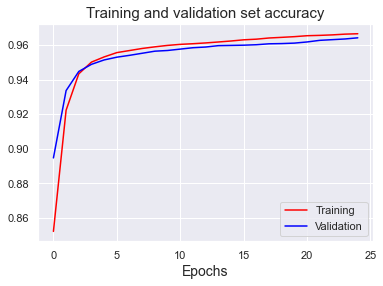

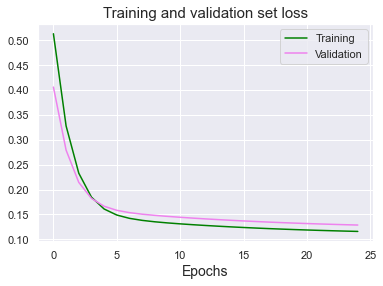

In [118]:
hist=run_NN0(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=64,
            num_epochs=25,plot_loss=True)

In [119]:
prove0=test_NN0(hist,x_test,y_test)
print(prove0)

0.5757333040237427


In [90]:
#this one overfit soon

In [98]:
nn_model=make_NN_model0(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=10,optimizer='SGD')

Epoch 1/25
547/547 [==============================] - 1s 915us/step - loss: 0.7695 - accuracy: 0.4686 - val_loss: 0.7654 - val_accuracy: 0.4727
Epoch 2/25
547/547 [==============================] - 0s 806us/step - loss: 0.7561 - accuracy: 0.4794 - val_loss: 0.7523 - val_accuracy: 0.4827
Epoch 3/25
547/547 [==============================] - 0s 785us/step - loss: 0.7431 - accuracy: 0.4888 - val_loss: 0.7397 - val_accuracy: 0.4916
Epoch 4/25
547/547 [==============================] - 0s 721us/step - loss: 0.7307 - accuracy: 0.4998 - val_loss: 0.7276 - val_accuracy: 0.5025
Epoch 5/25
547/547 [==============================] - 0s 752us/step - loss: 0.7188 - accuracy: 0.5097 - val_loss: 0.7160 - val_accuracy: 0.5103
Epoch 6/25
547/547 [==============================] - 0s 862us/step - loss: 0.7073 - accuracy: 0.5197 - val_loss: 0.7048 - val_accuracy: 0.5208
Epoch 7/25
547/547 [==============================] - 0s 752us/step - loss: 0.6962 - accuracy: 0.5303 - val_loss: 0.6941 - val_accuracy:

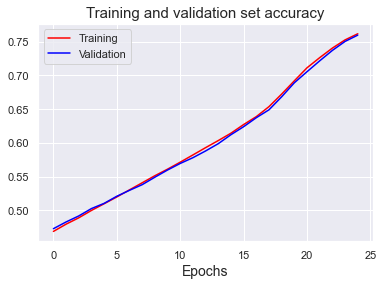

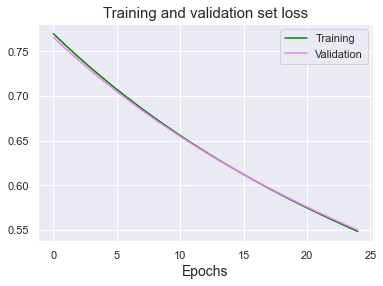

In [99]:
hist=run_NN0(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=64,
            num_epochs=25,plot_loss=True)

In [100]:
prove1=test_NN0(hist,x_test,y_test)
print(prove1)

0.5386666655540466


In [105]:
nn_model=make_NN_model0(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=10,optimizer='RMSprop')

Epoch 1/25
547/547 [==============================] - 1s 899us/step - loss: 0.7012 - accuracy: 0.5835 - val_loss: 0.6504 - val_accuracy: 0.7020
Epoch 2/25
547/547 [==============================] - 0s 778us/step - loss: 0.6061 - accuracy: 0.7909 - val_loss: 0.5620 - val_accuracy: 0.8403
Epoch 3/25
547/547 [==============================] - 0s 799us/step - loss: 0.5157 - accuracy: 0.8700 - val_loss: 0.4779 - val_accuracy: 0.8864
Epoch 4/25
547/547 [==============================] - 0s 762us/step - loss: 0.4360 - accuracy: 0.9010 - val_loss: 0.4074 - val_accuracy: 0.9063
Epoch 5/25
547/547 [==============================] - 0s 767us/step - loss: 0.3703 - accuracy: 0.9174 - val_loss: 0.3497 - val_accuracy: 0.9189
Epoch 6/25
547/547 [==============================] - 0s 762us/step - loss: 0.3171 - accuracy: 0.9287 - val_loss: 0.3031 - val_accuracy: 0.9281
Epoch 7/25
547/547 [==============================] - 0s 765us/step - loss: 0.2742 - accuracy: 0.9369 - val_loss: 0.2658 - val_accuracy:

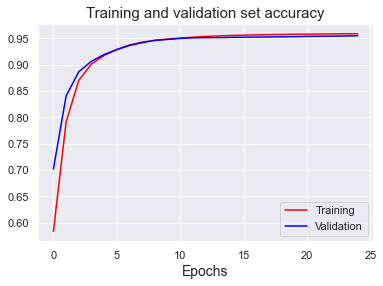

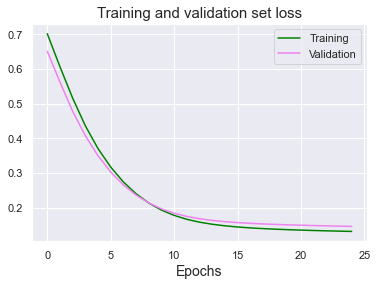

In [106]:
hist=run_NN0(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=64,
            num_epochs=25,plot_loss=True)

In [107]:
prove2=test_NN0(hist,x_test,y_test)
print(prove2)

0.5750666856765747


In [ ]:
#One layer overfit the data and gives low testing values

In [45]:
#Function to construct 2-hidden-layer Keras model

In [46]:
def make_NN_model(input_dim, num_classes, neuron_layer_1=20, neuron_layer_2=10, dropout_prob=0.25, \
                  activation_func='relu', learning_rate=0.01,optimizer='SGD'):
    """
    Creates a 2-hidden-layer Keras Neural Network model by adding densely connected layers, \
    dropout layers, and an output layer with 'softmax' activation with appropriate number of nodes for classification
    """
    model = Sequential()
    model.add(Dense(neuron_layer_1, input_shape=(input_dim,),activation=activation_func))
    model.add(Dropout(dropout_prob))
    model.add(Dense(neuron_layer_2,activation=activation_func))
    #model.add(Dense(50,activation='relu'))
    model.add(Dropout(dropout_prob))
    # Softmax activation for the last layer for classification
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer=='SGD':
        optimizer=tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
    if optimizer=='Adam':
        optimizer=tensorflow.keras.optimizers.Adam(learning_rate=learning_rate)
    if optimizer=='RMSprop':
        optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=learning_rate)
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])  #'accuracy'
    
    return model

In [47]:
#Function to run the NN model

In [48]:
def run_NN(model,x_train,y_train,x_val,y_val,num_epochs=200,batch_size=16,plot_loss=False,verbosity=0):
    #save best model as checkpointer
    from keras.callbacks import ModelCheckpoint
    checkpointer = ModelCheckpoint(filepath='weights.best.hdf5', 
                                   verbose=verbosity, save_best_only=True) #probabilmente dovrebbe andare fuori da funzione
    
    #filepath='model.weights.best.hdf5'
    
    # train the model
    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs,
              validation_data=(x_val, y_val), 
              verbose=verbosity, shuffle=False)
    
    if plot_loss:
        plt.plot(hist.history['accuracy'],color='red')
        plt.plot(hist.history['val_accuracy'],color='blue')
        plt.title("Training and validation set accuracy",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.legend(['Training','Validation'])
        plt.show()
        
    if plot_loss:
        plt.plot(hist.history['loss'],color='green')
        plt.plot(hist.history['val_loss'],color='violet')
        plt.title("Training and validation set loss",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.legend(['Training','Validation'])
        plt.show()
    
    return hist

In [49]:
#Function to test the NN model

In [50]:
def test_NN(hist,x_test,y_test):
    """
    Test a NN model with test data set for accuracy
    hist: A History object generated by the Keras model fitting process
    """
    score=hist.model.evaluate(x_test, y_test,verbose=0)[1]
    return score

In [51]:
#Basic run of the neural network (using Adam optimizer)

In [52]:
testing_ML=[]
score_f1=[]

In [105]:
nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=10,neuron_layer_2=5,optimizer='Adam')

Epoch 1/25
547/547 [==============================] - 1s 945us/step - loss: 0.7554 - accuracy: 0.4605 - val_loss: 0.6576 - val_accuracy: 0.6384
Epoch 2/25
547/547 [==============================] - 0s 862us/step - loss: 0.5989 - accuracy: 0.7467 - val_loss: 0.5518 - val_accuracy: 0.7897
Epoch 3/25
547/547 [==============================] - 0s 793us/step - loss: 0.5060 - accuracy: 0.8312 - val_loss: 0.4605 - val_accuracy: 0.8673
Epoch 4/25
547/547 [==============================] - 0s 794us/step - loss: 0.4142 - accuracy: 0.9051 - val_loss: 0.3708 - val_accuracy: 0.9223
Epoch 5/25
547/547 [==============================] - 0s 818us/step - loss: 0.3326 - accuracy: 0.9362 - val_loss: 0.2972 - val_accuracy: 0.9372
Epoch 6/25
547/547 [==============================] - 0s 823us/step - loss: 0.2700 - accuracy: 0.9427 - val_loss: 0.2432 - val_accuracy: 0.9435
Epoch 7/25
547/547 [==============================] - 0s 808us/step - loss: 0.2263 - accuracy: 0.9463 - val_loss: 0.2069 - val_accuracy:

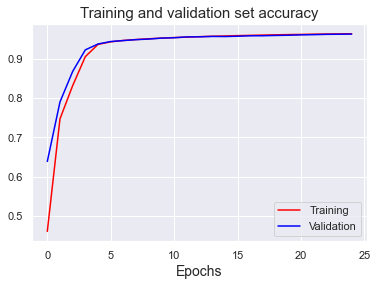

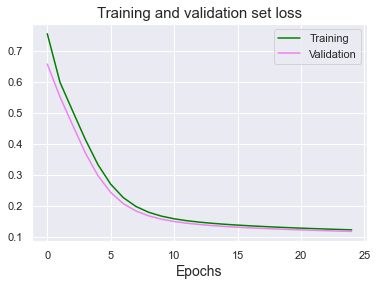

In [106]:
hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=64,
            num_epochs=25,plot_loss=True)

In [107]:
y_predicted=nn_model.predict(x_train_scaled)
print(y_predicted)
print(len(y_predicted))

[[0.00244147]
 [0.9798071 ]
 [0.0064097 ]
 ...
 [0.9511602 ]
 [0.01590556]
 [0.02000472]]
35000


In [108]:
y_val_pred_cat = (np.asarray(y_predicted)).round()
y_val_pred_cat

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [109]:
from sklearn.metrics import f1_score
score0=f1_score(y_train, y_val_pred_cat)
print(score0)

0.9578597080821061


In [110]:
testnn1=test_NN(hist,x_test_scaled,y_test)
print(testnn1)

0.9622666835784912


In [111]:
score_f1.append(score0)
testing_ML.append(testnn1)

In [114]:
nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=100,neuron_layer_2=50,optimizer='Adam')

Epoch 1/100
547/547 [==============================] - 1s 1ms/step - loss: 0.3979 - accuracy: 0.9002 - val_loss: 0.2156 - val_accuracy: 0.9440
Epoch 2/100
547/547 [==============================] - 0s 912us/step - loss: 0.1653 - accuracy: 0.9516 - val_loss: 0.1588 - val_accuracy: 0.9504
Epoch 3/100
547/547 [==============================] - 1s 1ms/step - loss: 0.1380 - accuracy: 0.9571 - val_loss: 0.1468 - val_accuracy: 0.9535
Epoch 4/100
547/547 [==============================] - 1s 978us/step - loss: 0.1287 - accuracy: 0.9596 - val_loss: 0.1393 - val_accuracy: 0.9568
Epoch 5/100
547/547 [==============================] - 1s 929us/step - loss: 0.1224 - accuracy: 0.9624 - val_loss: 0.1331 - val_accuracy: 0.9595
Epoch 6/100
547/547 [==============================] - 1s 929us/step - loss: 0.1173 - accuracy: 0.9643 - val_loss: 0.1281 - val_accuracy: 0.9611
Epoch 7/100
547/547 [==============================] - 1s 920us/step - loss: 0.1133 - accuracy: 0.9663 - val_loss: 0.1240 - val_accura

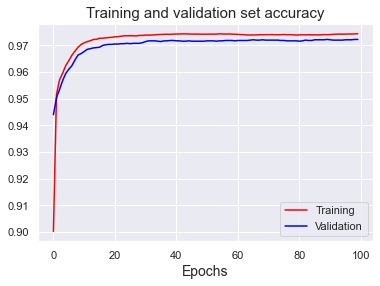

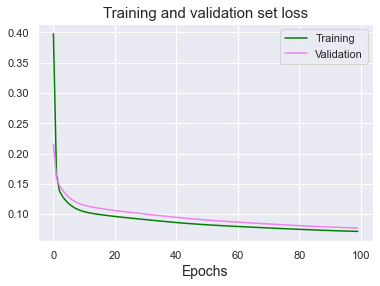

In [115]:
hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=64,
            num_epochs=100,plot_loss=True)

In [116]:
testnn=test_NN(hist,x_test_scaled,y_test)
print(testnn)

0.9737333059310913


The value of the area under the curve is:  0.9883714282571491


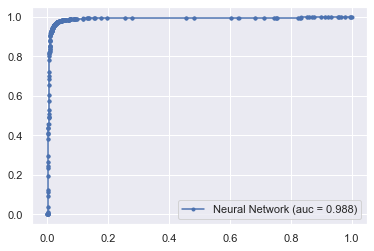

In [137]:
from sklearn.metrics import roc_curve, auc
y_pred_nn = nn_model.predict(x_val_scaled).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.legend()
print("The value of the area under the curve is: ",auc_keras)


In [69]:
nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=10,neuron_layer_2=5,optimizer='RMSprop')

Epoch 1/25
547/547 [==============================] - 1s 984us/step - loss: 0.6731 - accuracy: 0.5600 - val_loss: 0.6394 - val_accuracy: 0.5659
Epoch 2/25
547/547 [==============================] - 0s 834us/step - loss: 0.6104 - accuracy: 0.5730 - val_loss: 0.5793 - val_accuracy: 0.6305
Epoch 3/25
547/547 [==============================] - 0s 794us/step - loss: 0.5455 - accuracy: 0.7810 - val_loss: 0.5133 - val_accuracy: 0.8672
Epoch 4/25
547/547 [==============================] - 0s 797us/step - loss: 0.4779 - accuracy: 0.8834 - val_loss: 0.4467 - val_accuracy: 0.8908
Epoch 5/25
547/547 [==============================] - 0s 803us/step - loss: 0.4117 - accuracy: 0.9021 - val_loss: 0.3837 - val_accuracy: 0.9081
Epoch 6/25
547/547 [==============================] - 0s 799us/step - loss: 0.3507 - accuracy: 0.9167 - val_loss: 0.3249 - val_accuracy: 0.9208
Epoch 7/25
547/547 [==============================] - 0s 802us/step - loss: 0.2946 - accuracy: 0.9293 - val_loss: 0.2723 - val_accuracy:

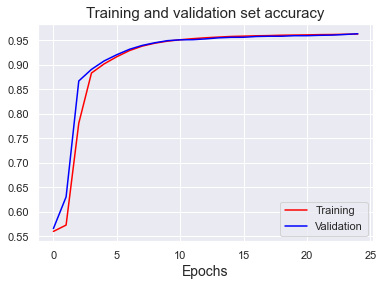

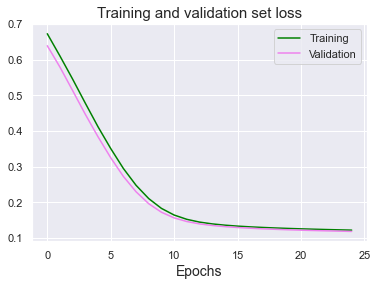

In [70]:
hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=64,
            num_epochs=25,plot_loss=True)

In [112]:
y_predictedRMS=nn_model.predict(x_train_scaled)
print(y_predictedRMS)
print(len(y_predictedRMS))

[[0.00244147]
 [0.9798071 ]
 [0.0064097 ]
 ...
 [0.9511602 ]
 [0.01590556]
 [0.02000472]]
35000


In [113]:
y_val_pred_catRMS = (np.asarray(y_predictedRMS)).round()
y_val_pred_catRMS

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [115]:
from sklearn.metrics import f1_score
score1=f1_score(y_train, y_val_pred_catRMS)
print(score1)

0.9578597080821061


In [116]:
testnn2=test_NN(hist,x_test_scaled,y_test)
print(testnn2)

0.9622666835784912


In [117]:
score_f1.append(score1)
testing_ML.append(testnn2)

The value of the area under the curve is:  0.986971996308707


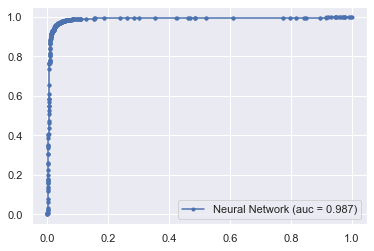

In [74]:
from sklearn.metrics import roc_curve, auc
y_pred_nn = nn_model.predict(x_val_scaled).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.legend()
print("The value of the area under the curve is: ",auc_keras)


In [93]:
#Basic run of the neural network (using Stochastic Gradient Descent optimizer)

In [124]:
nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=25,neuron_layer_2=10,optimizer='SGD')

Epoch 1/50
547/547 [==============================] - 1s 931us/step - loss: 0.7342 - accuracy: 0.5605 - val_loss: 0.7216 - val_accuracy: 0.5660
Epoch 2/50
547/547 [==============================] - 0s 798us/step - loss: 0.7223 - accuracy: 0.5605 - val_loss: 0.7106 - val_accuracy: 0.5660
Epoch 3/50
547/547 [==============================] - 0s 768us/step - loss: 0.7116 - accuracy: 0.5605 - val_loss: 0.7006 - val_accuracy: 0.5660
Epoch 4/50
547/547 [==============================] - 0s 783us/step - loss: 0.7018 - accuracy: 0.5605 - val_loss: 0.6914 - val_accuracy: 0.5660
Epoch 5/50
547/547 [==============================] - 0s 764us/step - loss: 0.6927 - accuracy: 0.5605 - val_loss: 0.6830 - val_accuracy: 0.5663
Epoch 6/50
547/547 [==============================] - 0s 784us/step - loss: 0.6843 - accuracy: 0.5606 - val_loss: 0.6750 - val_accuracy: 0.5667
Epoch 7/50
547/547 [==============================] - 0s 763us/step - loss: 0.6764 - accuracy: 0.5609 - val_loss: 0.6676 - val_accuracy:

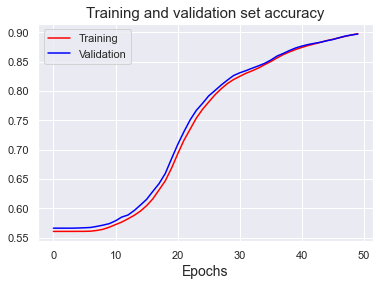

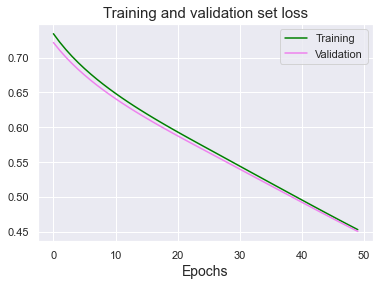

In [125]:
hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=64,
            num_epochs=50,plot_loss=True)

In [126]:
y_predictedSGD=nn_model.predict(x_train_scaled)
print(y_predictedSGD)
print(len(y_predictedSGD))

[[0.10197031]
 [0.58835185]
 [0.3436923 ]
 ...
 [0.5561764 ]
 [0.3618961 ]
 [0.21468523]]
35000


In [127]:
y_val_pred_catSGD = (np.asarray(y_predictedSGD)).round()
y_val_pred_catSGD

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [128]:
from sklearn.metrics import f1_score
score2=f1_score(y_train, y_val_pred_catSGD)
print(score2)

0.8773188055996138


In [129]:
testnn3=test_NN(hist,x_test_scaled,y_test)
print(testnn3)

0.8899999856948853


In [130]:
score_f1.append(score2)
testing_ML.append(testnn3)

The value of the area under the curve is:  0.9569733654912731


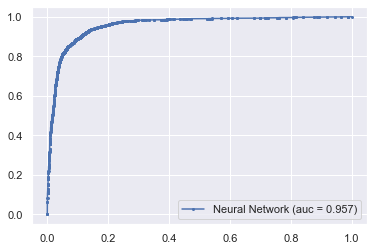

In [84]:
from sklearn.metrics import roc_curve, auc
y_pred_nn = nn_model.predict(x_val_scaled).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.',ms=4, label='Neural Network (auc = %0.3f)' % auc_keras)
plt.legend()
print("The value of the area under the curve is: ",auc_keras)

In [132]:
tested=np.array(testing_ML)
f1=np.array(score_f1)

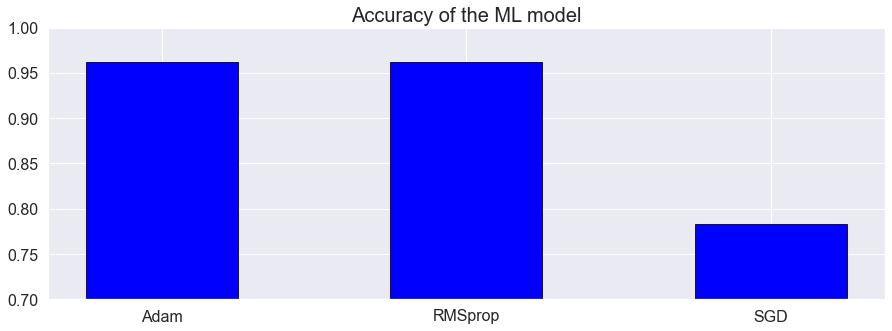

In [131]:
plt.figure(figsize=(15,5))
plt.title("Accuracy of the ML model",fontsize=20)
plt.bar(x=['Adam','RMSprop','SGD'],
        height=tested,width=0.5,color='blue',edgecolor='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0.7,1)
plt.show()

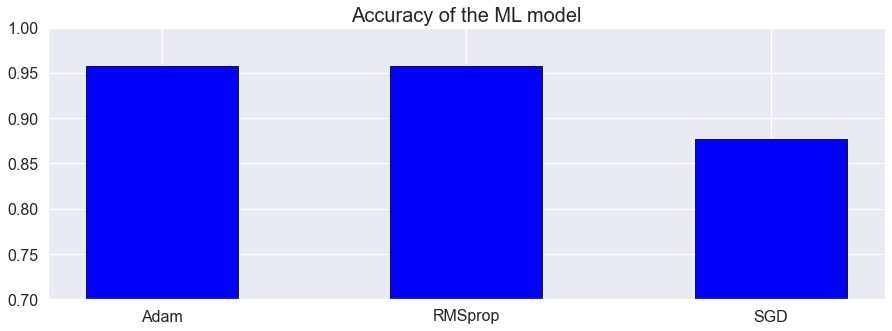

In [133]:
plt.figure(figsize=(15,5))
plt.title("Accuracy of the ML model",fontsize=20)
plt.bar(x=['Adam','RMSprop','SGD'],
        height=f1,width=0.5,color='blue',edgecolor='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0.7,1)
plt.show()

In [59]:
#new model

In [74]:
model = Sequential()
model.add(Dense(100, input_shape=(input_dim,),activation='selu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='selu'))
model.add(Dropout(0.1))
model.add(Dense(50,activation='selu'))
model.add(Dropout(0.1))
# sigmoid activation for the last layer for classification
model.add(Dense(1, activation='sigmoid'))

#Optimizer
optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001) #era 0.01 (con 0.001 lavora molto meglio)

model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [75]:
model.layers

In [76]:
model.inputs

[<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'dense_12_input')>]

In [77]:
model.outputs

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_15')>]

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               700       
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

Epoch 1/400
137/137 [==============================] - 1s 3ms/step - loss: 0.1732 - accuracy: 0.9409 - val_loss: 0.1491 - val_accuracy: 0.9520
Epoch 2/400
137/137 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.9539 - val_loss: 0.1315 - val_accuracy: 0.9607
Epoch 3/400
137/137 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.9600 - val_loss: 0.1232 - val_accuracy: 0.9632
Epoch 4/400
137/137 [==============================] - 0s 2ms/step - loss: 0.1202 - accuracy: 0.9641 - val_loss: 0.1179 - val_accuracy: 0.9665
Epoch 5/400
137/137 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9660 - val_loss: 0.1127 - val_accuracy: 0.9675
Epoch 6/400
137/137 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9663 - val_loss: 0.1113 - val_accuracy: 0.9664
Epoch 7/400
137/137 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.9675 - val_loss: 0.1075 - val_accuracy: 0.9673

Epoch 58/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0752 - accuracy: 0.9740 - val_loss: 0.0739 - val_accuracy: 0.9735
Epoch 59/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9737 - val_loss: 0.0745 - val_accuracy: 0.9727
Epoch 60/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9743 - val_loss: 0.0742 - val_accuracy: 0.9728
Epoch 61/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9741 - val_loss: 0.0743 - val_accuracy: 0.9727
Epoch 62/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9743 - val_loss: 0.0737 - val_accuracy: 0.9729
Epoch 63/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9744 - val_loss: 0.0747 - val_accuracy: 0.9724
Epoch 64/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9743 - val_loss: 0.0751 - val_accuracy:

Epoch 115/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9755 - val_loss: 0.0718 - val_accuracy: 0.9736
Epoch 116/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9751 - val_loss: 0.0714 - val_accuracy: 0.9739
Epoch 117/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9756 - val_loss: 0.0727 - val_accuracy: 0.9736
Epoch 118/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9748 - val_loss: 0.0719 - val_accuracy: 0.9735
Epoch 119/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9748 - val_loss: 0.0725 - val_accuracy: 0.9727
Epoch 120/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9754 - val_loss: 0.0721 - val_accuracy: 0.9731
Epoch 121/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9753 - val_loss: 0.0719 - val_ac

137/137 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9755 - val_loss: 0.0710 - val_accuracy: 0.9744
Epoch 228/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9753 - val_loss: 0.0703 - val_accuracy: 0.9745
Epoch 229/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9764 - val_loss: 0.0707 - val_accuracy: 0.9753
Epoch 230/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9761 - val_loss: 0.0711 - val_accuracy: 0.9741
Epoch 231/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9754 - val_loss: 0.0702 - val_accuracy: 0.9736
Epoch 232/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9762 - val_loss: 0.0708 - val_accuracy: 0.9740
Epoch 233/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9765 - val_loss: 0.0709 - val_accuracy: 0.9748

137/137 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9762 - val_loss: 0.0689 - val_accuracy: 0.9755
Epoch 340/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9761 - val_loss: 0.0694 - val_accuracy: 0.9743
Epoch 341/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9772 - val_loss: 0.0690 - val_accuracy: 0.9756
Epoch 342/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9776 - val_loss: 0.0688 - val_accuracy: 0.9745
Epoch 343/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9769 - val_loss: 0.0681 - val_accuracy: 0.9757
Epoch 344/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9766 - val_loss: 0.0685 - val_accuracy: 0.9763
Epoch 345/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9770 - val_loss: 0.0679 - val_accuracy: 0.9761

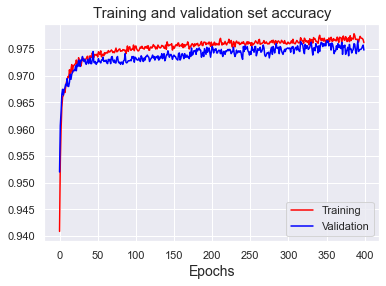

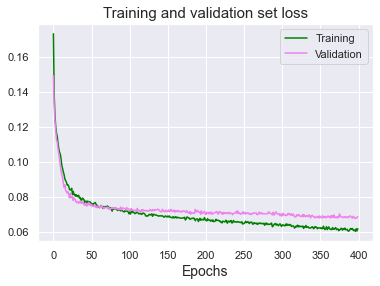

In [58]:
hist=run_NN(model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=400,plot_loss=True)

In [64]:
test_nn2_0=test_NN(hist,x_test_scaled,y_test)
print(test_nn2_0)

0.9739999771118164


Epoch 1/200
137/137 [==============================] - 1s 3ms/step - loss: 0.1727 - accuracy: 0.9419 - val_loss: 0.1514 - val_accuracy: 0.9533
Epoch 2/200
137/137 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9554 - val_loss: 0.1291 - val_accuracy: 0.9613
Epoch 3/200
137/137 [==============================] - 0s 2ms/step - loss: 0.1242 - accuracy: 0.9622 - val_loss: 0.1210 - val_accuracy: 0.9660
Epoch 4/200
137/137 [==============================] - 0s 2ms/step - loss: 0.1197 - accuracy: 0.9643 - val_loss: 0.1155 - val_accuracy: 0.9653
Epoch 5/200
137/137 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9652 - val_loss: 0.1114 - val_accuracy: 0.9681
Epoch 6/200
137/137 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9666 - val_loss: 0.1088 - val_accuracy: 0.9671
Epoch 7/200
137/137 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9679 - val_loss: 0.1049 - val_accuracy: 0.9688

Epoch 58/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9740 - val_loss: 0.0744 - val_accuracy: 0.9728
Epoch 59/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9734 - val_loss: 0.0730 - val_accuracy: 0.9728
Epoch 60/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9745 - val_loss: 0.0742 - val_accuracy: 0.9723
Epoch 61/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9744 - val_loss: 0.0740 - val_accuracy: 0.9719
Epoch 62/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.9740 - val_loss: 0.0734 - val_accuracy: 0.9729
Epoch 63/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9739 - val_loss: 0.0745 - val_accuracy: 0.9723
Epoch 64/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9741 - val_loss: 0.0731 - val_accuracy:

Epoch 115/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9750 - val_loss: 0.0722 - val_accuracy: 0.9721
Epoch 116/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9751 - val_loss: 0.0717 - val_accuracy: 0.9731
Epoch 117/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9750 - val_loss: 0.0709 - val_accuracy: 0.9744
Epoch 118/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9757 - val_loss: 0.0714 - val_accuracy: 0.9731
Epoch 119/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9754 - val_loss: 0.0717 - val_accuracy: 0.9744
Epoch 120/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9748 - val_loss: 0.0717 - val_accuracy: 0.9732
Epoch 121/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9754 - val_loss: 0.0720 - val_ac

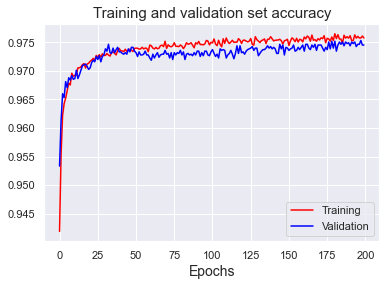

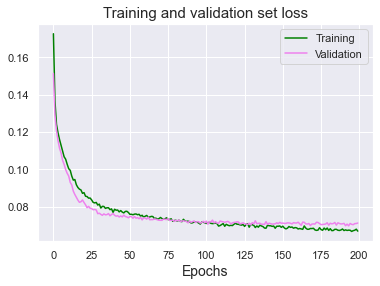

In [65]:
hist=run_NN(model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=200,plot_loss=True)

In [66]:
test_nn2_1=test_NN(hist,x_test_scaled,y_test)
print(test_nn2_1)

0.9742666482925415


The value of the area under the curve is:  0.9963453463203464


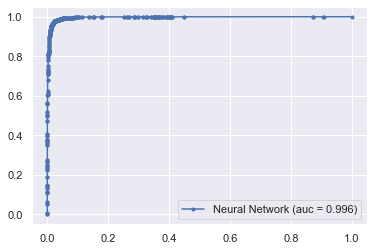

In [137]:
from sklearn.metrics import roc_curve, auc
y_pred_nn = model.predict(x_val_scaled).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.legend()
print("The value of the area under the curve is: ",auc_keras)

Epoch 1/100
137/137 [==============================] - 1s 3ms/step - loss: 0.1694 - accuracy: 0.9425 - val_loss: 0.1503 - val_accuracy: 0.9547
Epoch 2/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9550 - val_loss: 0.1339 - val_accuracy: 0.9603
Epoch 3/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1262 - accuracy: 0.9609 - val_loss: 0.1237 - val_accuracy: 0.9652
Epoch 4/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1224 - accuracy: 0.9640 - val_loss: 0.1186 - val_accuracy: 0.9652
Epoch 5/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1158 - accuracy: 0.9653 - val_loss: 0.1140 - val_accuracy: 0.9672
Epoch 6/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9671 - val_loss: 0.1096 - val_accuracy: 0.9680
Epoch 7/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9679 - val_loss: 0.1079 - val_accuracy: 0.9671

Epoch 58/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9739 - val_loss: 0.0754 - val_accuracy: 0.9720
Epoch 59/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9741 - val_loss: 0.0744 - val_accuracy: 0.9727
Epoch 60/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0768 - accuracy: 0.9733 - val_loss: 0.0744 - val_accuracy: 0.9732
Epoch 61/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9738 - val_loss: 0.0752 - val_accuracy: 0.9719
Epoch 62/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.9733 - val_loss: 0.0742 - val_accuracy: 0.9728
Epoch 63/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9745 - val_loss: 0.0752 - val_accuracy: 0.9725
Epoch 64/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9751 - val_loss: 0.0742 - val_accuracy:

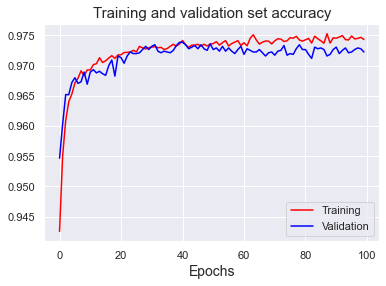

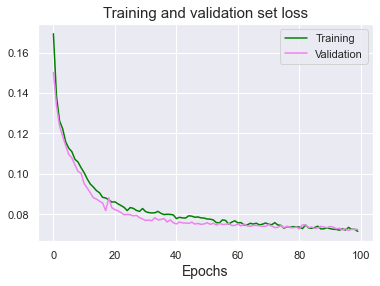

In [72]:
hist=run_NN(model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=100,plot_loss=True)

In [73]:
test_nn2_2=test_NN(hist,x_test_scaled,y_test)
print(test_nn2_2)

0.974133312702179


The value of the area under the curve is:  0.996361571011076


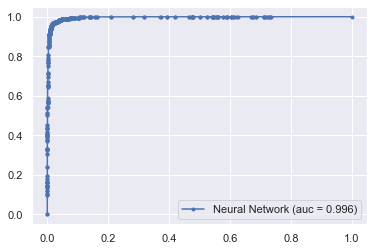

In [165]:
from sklearn.metrics import roc_curve, auc
y_pred_nn = model.predict(x_val_scaled).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.legend()
print("The value of the area under the curve is: ",auc_keras)

Epoch 1/50
137/137 [==============================] - 1s 3ms/step - loss: 0.1798 - accuracy: 0.9363 - val_loss: 0.1510 - val_accuracy: 0.9527
Epoch 2/50
137/137 [==============================] - 0s 2ms/step - loss: 0.1396 - accuracy: 0.9553 - val_loss: 0.1311 - val_accuracy: 0.9603
Epoch 3/50
137/137 [==============================] - 0s 2ms/step - loss: 0.1268 - accuracy: 0.9616 - val_loss: 0.1233 - val_accuracy: 0.9633
Epoch 4/50
137/137 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9637 - val_loss: 0.1168 - val_accuracy: 0.9656
Epoch 5/50
137/137 [==============================] - 0s 2ms/step - loss: 0.1181 - accuracy: 0.9643 - val_loss: 0.1122 - val_accuracy: 0.9673
Epoch 6/50
137/137 [==============================] - 0s 2ms/step - loss: 0.1144 - accuracy: 0.9666 - val_loss: 0.1099 - val_accuracy: 0.9664
Epoch 7/50
137/137 [==============================] - 0s 2ms/step - loss: 0.1106 - accuracy: 0.9672 - val_loss: 0.1065 - val_accuracy: 0.9675
Epoch 

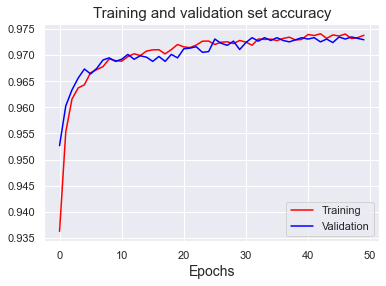

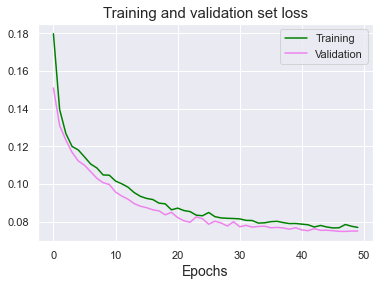

In [78]:
hist=run_NN(model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=50,plot_loss=True)

In [79]:
test_nn2_3=test_NN(hist,x_test_scaled,y_test)
print(test_nn2_3)

0.9745333194732666


the value of the area under the curve is:  0.9958993145743147


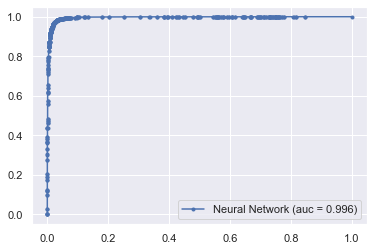

In [129]:
from sklearn.metrics import roc_curve, auc
y_pred_nn = model.predict(x_val_scaled).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.legend()
print("The value of the area under the curve is: ",auc_keras)

In [64]:
#Running for num_epochs = 5

In [65]:
train_acc_n=[]
val_acc_n=[]

val_range=(2,21,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=i,neuron_layer_2=i,optimizer='Adam')
    hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=5,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_n.append(acc_train)
    val_acc_n.append(acc_val)
    print(f"Done for number of neurons (each hidden layer): {i}")

Done for number of neurons (each hidden layer): 2
Done for number of neurons (each hidden layer): 3
Done for number of neurons (each hidden layer): 4
Done for number of neurons (each hidden layer): 5
Done for number of neurons (each hidden layer): 6
Done for number of neurons (each hidden layer): 7
Done for number of neurons (each hidden layer): 8
Done for number of neurons (each hidden layer): 9
Done for number of neurons (each hidden layer): 10
Done for number of neurons (each hidden layer): 11
Done for number of neurons (each hidden layer): 12
Done for number of neurons (each hidden layer): 13
Done for number of neurons (each hidden layer): 14
Done for number of neurons (each hidden layer): 15
Done for number of neurons (each hidden layer): 16
Done for number of neurons (each hidden layer): 17
Done for number of neurons (each hidden layer): 18
Done for number of neurons (each hidden layer): 19
Done for number of neurons (each hidden layer): 20


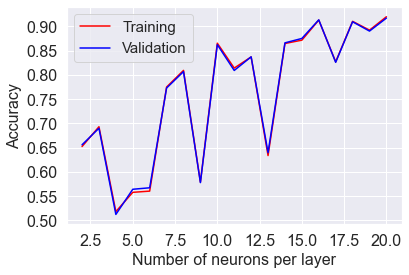

In [66]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_n,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_n,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neurons per layer", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.0,0.9)
plt.show()

In [67]:
#Running for num_epochs = 10

In [68]:
train_acc_n=[]
val_acc_n=[]

val_range=(2,21,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=i,neuron_layer_2=i,optimizer='Adam')
    hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=10,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_n.append(acc_train)
    val_acc_n.append(acc_val)
    print(f"Done for number of neurons (each hidden layer): {i}")

Done for number of neurons (each hidden layer): 2
Done for number of neurons (each hidden layer): 3
Done for number of neurons (each hidden layer): 4
Done for number of neurons (each hidden layer): 5
Done for number of neurons (each hidden layer): 6
Done for number of neurons (each hidden layer): 7
Done for number of neurons (each hidden layer): 8
Done for number of neurons (each hidden layer): 9
Done for number of neurons (each hidden layer): 10
Done for number of neurons (each hidden layer): 11
Done for number of neurons (each hidden layer): 12
Done for number of neurons (each hidden layer): 13
Done for number of neurons (each hidden layer): 14
Done for number of neurons (each hidden layer): 15
Done for number of neurons (each hidden layer): 16
Done for number of neurons (each hidden layer): 17
Done for number of neurons (each hidden layer): 18
Done for number of neurons (each hidden layer): 19
Done for number of neurons (each hidden layer): 20


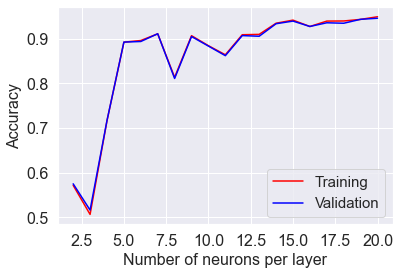

In [69]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_n,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_n,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neurons per layer", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.0,0.9)
plt.show()

In [70]:
#Running for num_epochs = 25

In [71]:
train_acc_n=[]
val_acc_n=[]

val_range=(2,21,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=i,neuron_layer_2=i,optimizer='Adam')
    hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=25,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_n.append(acc_train)
    val_acc_n.append(acc_val)
    print(f"Done for number of neurons (each hidden layer): {i}")

Done for number of neurons (each hidden layer): 2
Done for number of neurons (each hidden layer): 3
Done for number of neurons (each hidden layer): 4
Done for number of neurons (each hidden layer): 5
Done for number of neurons (each hidden layer): 6
Done for number of neurons (each hidden layer): 7
Done for number of neurons (each hidden layer): 8
Done for number of neurons (each hidden layer): 9
Done for number of neurons (each hidden layer): 10
Done for number of neurons (each hidden layer): 11
Done for number of neurons (each hidden layer): 12
Done for number of neurons (each hidden layer): 13
Done for number of neurons (each hidden layer): 14
Done for number of neurons (each hidden layer): 15
Done for number of neurons (each hidden layer): 16
Done for number of neurons (each hidden layer): 17
Done for number of neurons (each hidden layer): 18
Done for number of neurons (each hidden layer): 19
Done for number of neurons (each hidden layer): 20


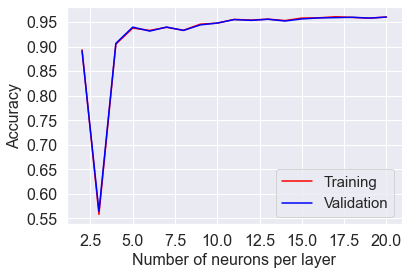

In [72]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_n,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_n,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neurons per layer", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.0,0.9)
plt.show()

In [73]:
#LEARNING CURVE: Varying training set size

Done for: 10% training set size. Took 1.74 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.8392000198364258
Testing the validation with the actual percentage of data the evaluation parameter is: 0.8416000008583069
Done for: 20% training set size. Took 2.21 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.7318999767303467
Testing the validation with the actual percentage of data the evaluation parameter is: 0.7192000150680542
Done for: 30% training set size. Took 2.26 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.916533350944519
Testing the validation with the actual percentage of data the evaluation parameter is: 0.9110666513442993
Done for: 40% training set size. Took 2.8 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.9030500054359436
Testing the validation with the actual percentage of data th

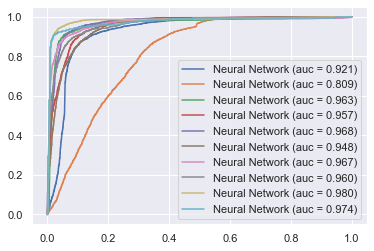

In [130]:
import time
val_acc_train_size=[]
train_acc_train_size=[]
test_acc_train_size=[]
time_sampling=[]

val_range=(10,101,10)
for i in range(val_range[0],val_range[1],val_range[2]):
    t1=time.time()
    percentage=i*0.01
    # Sampling
    df_sampled = data.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    x_train_sampled=StandardScaler().fit_transform(x_train_sampled)
    # Fitting and Predictions
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=5,neuron_layer_2=5,optimizer='Adam')
    hist=run_NN(nn_model,x_train_sampled,y_train_sampled,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=25,plot_loss=False)
    
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_sampled, y_train_sampled,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
    acc_test=hist.model.evaluate(x_test_scaled,y_test,verbose=0)[1]
    
   # Appending to the lists
    train_acc_train_size.append(acc_train)
    val_acc_train_size.append(acc_val)
    test_acc_train_size.append(acc_test)
    
    t2=time.time()
    time_sampling.append(t2-t1)
    print(f"Done for: {i}% training set size. Took {round((t2-t1),2)} seconds.")
    
    
    
    print(f"Testing the training with the actual percentage of data the evaluation parameter is: {acc_train}")
    print(f"Testing the validation with the actual percentage of data the evaluation parameter is: {acc_val}")
    
    from sklearn.metrics import roc_curve, auc
    y_pred_nn = nn_model.predict(x_val_scaled).ravel()
    nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
    auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
    plt.plot(nn_fpr_keras, nn_tpr_keras, label='Neural Network (auc = %0.3f)' % auc_keras)
    plt.legend()
    #print("The value of the area under the curve is: ",auc_keras)

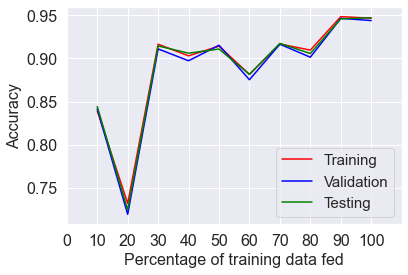

In [131]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.plot(range(val_range[0],val_range[1],val_range[2]),test_acc_train_size,c='green')
plt.legend(["Training","Validation","Testing"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.8,0.9)
plt.xlim(0,110)
plt.show()

In [76]:
#To smooth out the dependence on training set size, can we increase the learning rate?

In [144]:
val_acc_train_size=[]
train_acc_train_size=[]
test_acc_train_size=[]

val_range=(10,101,10)
for i in range(val_range[0],val_range[1],val_range[2]):
    percentage=i*0.01
    # Sampling
    df_sampled = data.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    x_train_sampled=StandardScaler().fit_transform(x_train_sampled)
    # Fitting and Predictions
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.001,
                      neuron_layer_1=5,neuron_layer_2=5,optimizer='Adam')
    hist=run_NN(nn_model,x_train_sampled,y_train_sampled,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=25,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_sampled, y_train_sampled,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
    acc_test=hist.model.evaluate(x_test_scaled,y_test,verbose=0)[1]
   # Appending to the lists
    train_acc_train_size.append(acc_train)
    val_acc_train_size.append(acc_val)
    test_acc_train_size.append(acc_test)
    
    print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


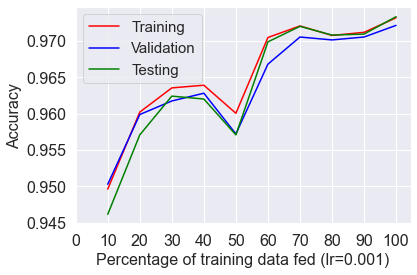

In [145]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.plot(range(val_range[0],val_range[1],val_range[2]),test_acc_train_size,c='green')
plt.legend(["Training","Validation","Testing"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed (lr=0.001)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.5,0.9)
#plt.xlim(0,110)
plt.show()

In [ ]:
#Even more high the learning rate

In [142]:
val_acc_train_size=[]
train_acc_train_size=[]
test_acc_train_size=[]

val_range=(10,101,10)
for i in range(val_range[0],val_range[1],val_range[2]):
    percentage=i*0.01
    # Sampling
    df_sampled = data.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    x_train_sampled=StandardScaler().fit_transform(x_train_sampled)
    # Fitting and Predictions
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.01,
                      neuron_layer_1=5,neuron_layer_2=5,optimizer='Adam')
    hist=run_NN(nn_model,x_train_sampled,y_train_sampled,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=25,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_sampled, y_train_sampled,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
    acc_test=hist.model.evaluate(x_test_scaled,y_test,verbose=0)[1]
   # Appending to the lists
    train_acc_train_size.append(acc_train)
    val_acc_train_size.append(acc_val)
    test_acc_train_size.append(acc_test)
    
    print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


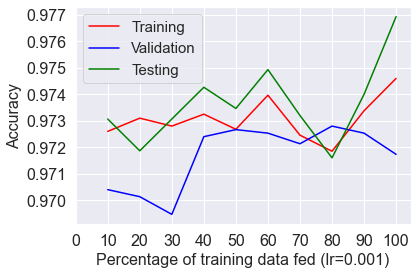

In [143]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.plot(range(val_range[0],val_range[1],val_range[2]),test_acc_train_size,c='green')
plt.legend(["Training","Validation","Testing"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed (lr=0.001)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.5,0.9)
#plt.xlim(0,110)
plt.show()

Shape of validation set: (750, 6)
Shape of test set: (750, 6)
Shape of training set: (3500, 6)
Done for: 10% training set size. Took 1.21 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.8611428737640381
Testing the validation with the actual percentage of data the evaluation parameter is: 0.8706666827201843
Shape of validation set: (1500, 6)
Shape of test set: (1500, 6)
Shape of training set: (7000, 6)
Done for: 20% training set size. Took 1.43 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.7532857060432434
Testing the validation with the actual percentage of data the evaluation parameter is: 0.7526666522026062
Shape of validation set: (2250, 6)
Shape of test set: (2250, 6)
Shape of training set: (10500, 6)
Done for: 30% training set size. Took 1.74 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.8994285464286804
Testing the validation with th

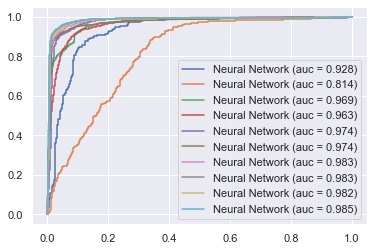

In [127]:
import time
val_acc_train_size=[]
train_acc_train_size=[]
time_sampling=[]

val_range=(10,101,10)
for i in range(val_range[0],val_range[1],val_range[2]):
    t1=time.time()
    percentage=i*0.01
    # Sampling
    df_sampled = data.sample(frac=percentage)
    yy=df_sampled.id
    xx=df_sampled.drop('id',axis=1)
    
    x_train_sampled, x_test_sampled, y_train_sampled, y_test_sampled = train_test_split(xx, yy, test_size=0.30)
    x_test_sampled, x_val_sampled, y_test_sampled, y_val_sampled = train_test_split(x_test_sampled, y_test_sampled, test_size=0.50)
    print("Shape of validation set:", x_val_sampled.shape)
    print("Shape of test set:", x_test_sampled.shape)
    print("Shape of training set:", x_train_sampled.shape)
    
    
    x_train_sampled=StandardScaler().fit_transform(x_train_sampled)
    x_test_sampled=StandardScaler().fit_transform(x_test_sampled)
    x_val_sampled=StandardScaler().fit_transform(x_val_sampled)
    # Fitting and Predictions
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=10,neuron_layer_2=15,optimizer='Adam')
    hist=run_NN(nn_model,x_train_sampled,y_train_sampled,x_val_sampled,y_val_sampled,verbosity=0,batch_size=256,
            num_epochs=25,plot_loss=False)
    
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_sampled, y_train_sampled,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_sampled,y_val_sampled,verbose=0)[1]
    
   # Appending to the lists
    train_acc_train_size.append(acc_train)
    val_acc_train_size.append(acc_val)
    
    t2=time.time()
    time_sampling.append(t2-t1)
    print(f"Done for: {i}% training set size. Took {round((t2-t1),2)} seconds.")
    
    
    
    print(f"Testing the training with the actual percentage of data the evaluation parameter is: {acc_train}")
    print(f"Testing the validation with the actual percentage of data the evaluation parameter is: {acc_val}")
    
    from sklearn.metrics import roc_curve, auc
    y_pred_nn = nn_model.predict(x_val_sampled).ravel()
    nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val_sampled, y_pred_nn)
#y_val era y_test, ma credo che il df era diviso solo in train e test
#con y_val da una retta tra 0 e 1, quindi come se fossero completamente decorrelati
#con y_test invece più i meno funziona
#ERA UN  PROBLEMA DI COERENZA, PERCHE ANCHE y_pred_nn era con test, se entrambi sono con lo stesso nome funziona
#INOLTRE FUNZIONA ANCORA MEGLIO USANDO IL DATASET x_val_scaled!!!
    auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
    plt.plot(nn_fpr_keras, nn_tpr_keras, label='Neural Network (auc = %0.3f)' % auc_keras)
    plt.legend()
    #print("The value of the area under the curve is: ",auc_keras)

#y_test=y_val
#y_pred = model.predict(x_test).ravel()

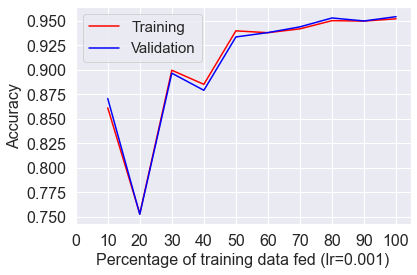

In [128]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed (lr=0.001)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.5,0.9)
#plt.xlim(0,110)
plt.show()

In [ ]:
#A good fit is identified by a training and validation loss that decreases to a point of stability with 
#a minimal gap between the two final loss values.